# **LAB DIGITAL ASSIGNMENT 3**
# **SUBJECT: NATURAL LANGUAGE PROCESSING LAB (PMDS606P)**
# **CLASS ID - VL2025260105170**
<br>
<br>

## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**
## **Course: M.Sc Data Science**

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import words
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

In [3]:
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sambh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sambh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [14]:
def processURL(url):
    # 1. Read the text content from the given link and store the content in the variable textContent
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    textContent = soup.get_text(separator=' ', strip=True)

    # 2. Preprocess the data in textContent and keep only valid English dictionary words.
    english_vocab = set(words.words())
    textContent = re.sub(r'[^A-Za-z\s]', ' ', textContent)  
    tokens = nltk.word_tokenize(textContent)
    tokenizedWords = [w.lower() for w in tokens if w.lower() in english_vocab]

    # 3. Tokenize all the words and store them in tokenizedWords and convert them into lower case. 
    numberOfWords = len(tokenizedWords)

    # 4. Find the total number of words in tokenizedWords and store the result in numberOfWords
    uniqueWords = set(tokenizedWords)
    numberOfUniqueWords = len(uniqueWords)

    # 5. Find the total number of unique words in tokenizedWords and store the result in 
    # numberOfUniqueWords. Store all the unique words in uniqueWords.
    word_counts = Counter(tokenizedWords)

    maxFreq = word_counts.most_common(10)


    words_top = [w for w, _ in maxFreq]
    counts_top = [c for _, c in maxFreq]

    # Plot only top 10
    plt.figure(figsize=(10, 5))
    plt.bar(words_top, counts_top, color="skyblue")
    plt.title("Top 10 Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

    # 6. Perform Histogram Analysis on uniqueWords.
    print("Top 10 frequent words:", maxFreq)

    # 7. Find the 10 most frequent words and store the result in the variable maxFreq.
    sentences = [tokenizedWords]  
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    X = model.wv[uniqueWords]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(uniqueWords):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title("2D Visualization of Word Embeddings")
    plt.show()

    # 8. Generate a word embedding for the web page using only uniqueWords (use 100 dimensions).
    print("\nMost similar words:")
    for word in list(uniqueWords)[:5]:  
        try:
            print(word, ":", model.wv.most_similar(word, topn=3))
        except KeyError:
            pass

    return {
        "numberOfWords": numberOfWords,
        "numberOfUniqueWords": numberOfUniqueWords,
        "uniqueWords": list(uniqueWords),
        "maxFreq": maxFreq
    }

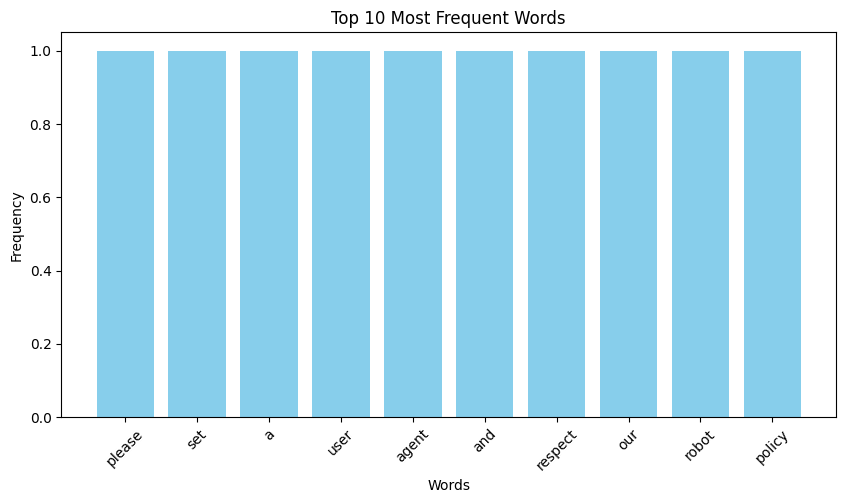

Top 10 frequent words: [('please', 1), ('set', 1), ('a', 1), ('user', 1), ('agent', 1), ('and', 1), ('respect', 1), ('our', 1), ('robot', 1), ('policy', 1)]


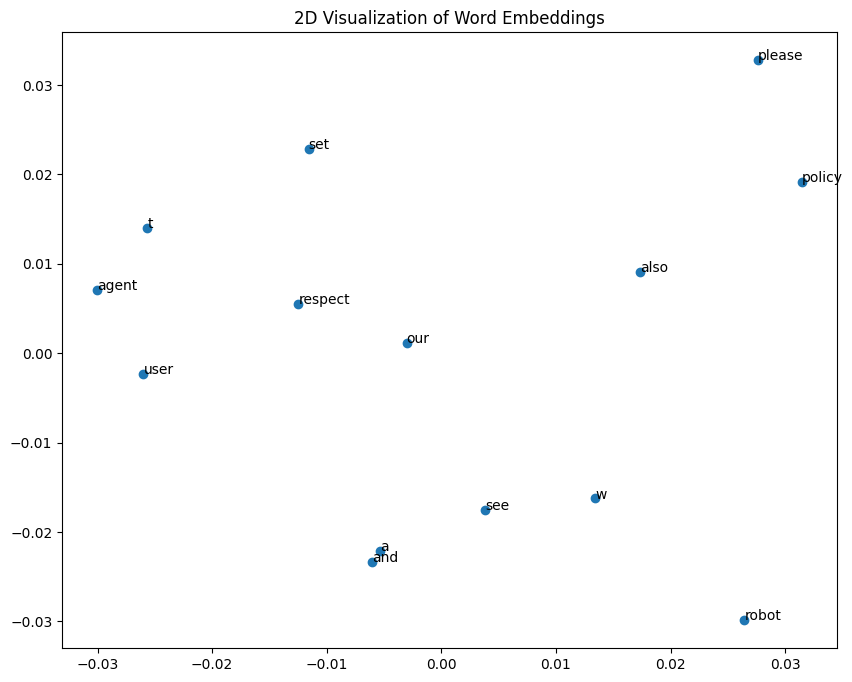


Most similar words:
also : [('please', 0.137244313955307), ('w', 0.06798267364501953), ('and', 0.03364057466387749)]
set : [('policy', 0.15016479790210724), ('user', 0.12813477218151093), ('t', 0.0931011214852333)]
and : [('see', 0.19912345707416534), ('w', 0.07496878504753113), ('robot', 0.06059345230460167)]
a : [('see', 0.17293265461921692), ('robot', 0.16717541217803955), ('respect', 0.11115383356809616)]
please : [('policy', 0.25295141339302063), ('also', 0.1372442990541458), ('robot', 0.04443884640932083)]
{'numberOfWords': 14, 'numberOfUniqueWords': 14, 'uniqueWords': ['also', 'set', 'and', 'a', 'please', 'w', 't', 'agent', 'our', 'see', 'respect', 'robot', 'policy', 'user'], 'maxFreq': [('please', 1), ('set', 1), ('a', 1), ('user', 1), ('agent', 1), ('and', 1), ('respect', 1), ('our', 1), ('robot', 1), ('policy', 1)]}


In [15]:
url = "https://en.wikipedia.org/wiki/Cricket"
result = processURL(url)
print(result)